### Компьютерные игры

Нужно выявить определяющие успешность игры закономерности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import numpy as np

### Шаг 1. Открытие файла с данными и изучение общей информации

In [2]:
data = pd.read_csv('/datasets/games.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В столбце Year_of_Release есть незначительное количество пропусков. Много пропусков в столбцах Critic_Score, User_Score,      Rating. Столбец User_Score имеет тип данных object, что неправильно, т.к. User_Score это количественная оценка, предусматривающая оценку по десятибальной шкале с точностью до десятых, т.е. в данном случае тип данных должен быть float.

### Шаг 2. Подготовка данныx

Замена названия столбцов (приведение к нижнему регистру);

In [3]:
data.set_axis(data.columns.str.lower(), axis = 'columns', inplace = True)

Преобразование данных в нужные типы.

Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам;

In [4]:
data = data.query('year_of_release != "nan"')
data['year_of_release'] = data['year_of_release'].astype('int')

От пропусков по релизу отказываемся, их всего 269 (менее 3 %). Год важен.

Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. 
Отдельно разберите это значение и опишите, как его обработать;

In [5]:
data_s = data.query('user_score != "tbd"')
data_s['user_score'] = data_s['user_score'].astype('float')
data['user_score'] = data['user_score'].replace('tbd', data_s['user_score'].median())
data['user_score'] = data['user_score'].astype('float')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


user_score неоходим тип данных перевести в float для выполнения разных в т.ч.логических операций(<,>)
tbd - подлежит определению, рейтинг не определён. Заменено на значение медианы.

Данные столбца critic_score, имеет тип данных float, что уже позволяет с ними выполнять арифметические операции. В данном столбце нет tbd и других object. Данные столбца critic_score можно перевести в int, но не нужно.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [7]:
data['kassa'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Шаг 3. Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int')
data_year = data.pivot_table(index = 'year_of_release', values = 'kassa', aggfunc = 'count')
data_year

,kassa
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


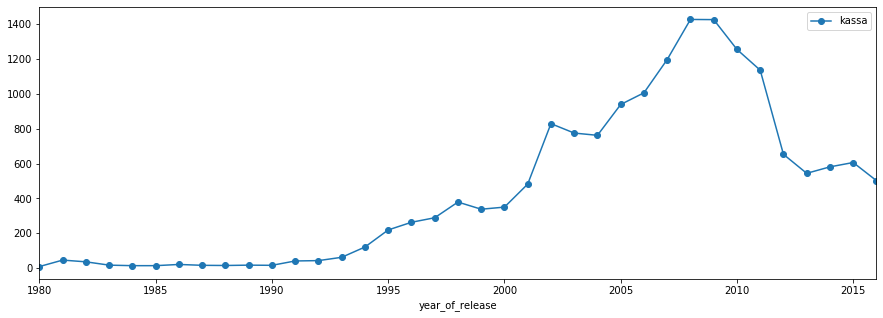

               График "Количество выпущенных игр по годам (1980-2016)"


In [9]:
data_year = data_year.reset_index()
data_year.plot(x = 'year_of_release', y = 'kassa', style = 'o-', xlim=(1980,2016), figsize=(15,5), sharex=False)
plt.show()
print('               График "Количество выпущенных игр по годам (1980-2016)"')

В 1993 можно наблюдать сильный скачок двухзначных цифр (в сравнении с 1992 годом) в 2 раза.
В 2002 можно наблюдать сильный скачок трёхзначных цифр (в сравнении с 2001 годом) в 2 раза.
С 2011 8 поколение приставок. Сложная видеографика (создание игр сложнее), финансовый кризис ...

In [10]:
data_year = data.query('year_of_release >= 1998')
data_year['platform'].value_counts()

PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PC       932
GBA      811
XB       803
PS       722
GC       542
3DS      512
PSV      429
PS4      392
N64      249
XOne     247
WiiU     147
DC        52
GB        46
SAT       30
WS         6
SNES       3
Name: platform, dtype: int64

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [11]:
data_year_P_Pl = data_year.pivot_table(index = 'platform', columns = 'year_of_release',
                                      values = 'kassa', aggfunc = 'sum')
data_year_P_Pl = data_year_P_Pl.reset_index()
data_year_P_Pl = data_year_P_Pl.fillna(0)

df = data_year_P_Pl

#data_year_P_Pl.loc[8:11]
data_year_PS = df[df['platform'].isin(('PS', 'PS2', 'PS3', 'PS4', 'XB', 'X360', 'XOne'))]
data_year_PS

year_of_release,platform,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
8,PS,169.49,144.53,96.37,35.59,6.67,2.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,PS2,0.00,0.00,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00
10,PS3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60
11,PS4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25
19,X360,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52
20,XB,0.00,0.00,0.99,22.26,48.01,55.04,65.42,49.08,10.04,0.55,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
21,XOne,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.96,54.07,60.14,26.15


Все основные платформы PS является очень популярными, являются флагманом, по которому можно отслеживать тенденции и закономерности. Из представленного среза - можно судить о том, что жизненный цикл платформы на рынке это примерно 10 лет. Где-то примерно после пика продаж игр на конкретную платформу появляется новое поколение платформ. В 2013 году появилось новое поколение платформ от PS. Значит правильно строить прогноз на 2017 надо на данных начиная с 2012 (это будет актуальный период).
(Прямой конкурент PS - XBox демонстрирует похожий жизненный цикл и в 2013 году у него тоже появилось новое поколение платформ от XBox)

#В этих строчках присутствует основные поколения приставок. Переделал - теперь через isin()

In [12]:
df['sum'] = (df[1998] + df[1999] + df[2000] + df[2001] + df[2002] 
             + df[2003] + df[2004] + df[2005]  + df[2006] + df[2007] + df[2008]
             + df[2009] + df[2010] + df[2011]  + df[2012] + df[2013] + df[2014] + df[2015] + df[2016])
df.sort_values('sum', ascending = False)

year_of_release,platform,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,sum
9,PS2,0.00,0.00,39.17,166.43,205.38,184.31,211.81,160.66,103.42,...,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00,1233.56
19,X360,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.25,51.62,...,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
10,PS3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.96,...,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
17,Wii,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,137.15,...,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
2,DS,0.00,0.00,0.00,0.00,0.00,0.00,17.27,130.14,119.81,...,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00,802.76
8,PS,169.49,144.53,96.37,35.59,6.67,2.07,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,454.72
11,PS4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
4,GBA,0.00,0.00,0.07,61.53,74.16,56.67,77.91,33.86,5.28,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,312.88
12,PSP,0.00,0.00,0.00,0.00,0.00,0.00,7.06,43.84,55.32,...,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,0.00,289.53
0,3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14,257.81


In [13]:
data_pivot_P = data.pivot_table(index = 'platform', 
                                values = 'kassa', aggfunc = 'sum')

data_pivot_P_TD = data_pivot_P.sort_values('kassa', ascending = False).head()
data_pivot_P_TD = data_pivot_P_TD.reset_index()

Top = data_pivot_P_TD['platform'].tolist()

print(data_pivot_P.sort_values('kassa', ascending = False).head(50))

            kassa
platform         
PS2       1233.56
X360       961.24
PS3        931.34
Wii        891.18
DS         802.78
PS         727.58
PS4        314.14
GBA        312.88
PSP        289.53
3DS        257.81
PC         255.76
GB         254.43
XB         251.57
NES        251.05
N64        218.01
SNES       200.04
GC         196.73
XOne       159.32
2600        86.48
WiiU        82.19
PSV         53.81
SAT         33.59
GEN         30.77
DC          15.95
SCD          1.86
NG           1.44
WS           1.42
TG16         0.16
3DO          0.10
GG           0.04
PCFX         0.03


In [14]:
data_year_P_FG = data_year.pivot_table(index = ['platform', 'year_of_release'],
                                      values = 'kassa', aggfunc = 'sum')
data_year_P_FG

kassa
platform year_of_release       
3DS      2011             63.20
         2012             51.36
         2013             56.57
         2014             43.76
         2015             27.78
...                         ...
XB       2008              0.18
XOne     2013             18.96
         2014             54.07
         2015             60.14
         2016             26.15

[165 rows x 1 columns]

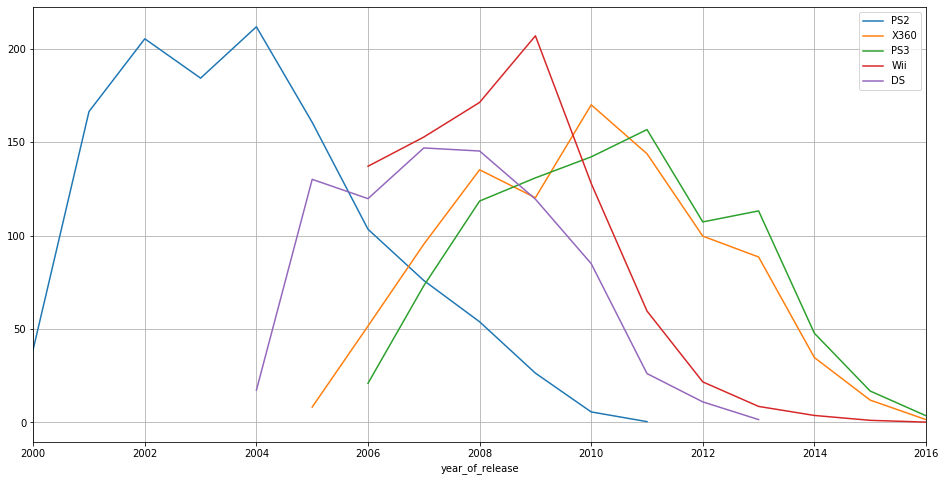

In [15]:
fig, ax = plt.subplots()
for row in Top:
    data_year_P_FG.loc[row].plot(ax=ax, figsize = (16, 8), grid = True)
ax.legend(Top)

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [16]:
data_actual = data.query('year_of_release >= 2012')
data_actual_P = data_actual.pivot_table(index = 'platform', 
                                values = 'kassa', aggfunc = 'sum')
data_actual_P = data_actual_P.reset_index()
print(data_actual_P.sort_values('kassa', ascending = False).head(50))

   platform   kassa
4       PS4  314.14
3       PS3  288.79
9      X360  236.54
0       3DS  194.61
10     XOne  159.32
8      WiiU   82.19
2        PC   62.65
6       PSV   49.18
7       Wii   35.37
1        DS   12.55
5       PSP   11.19


Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

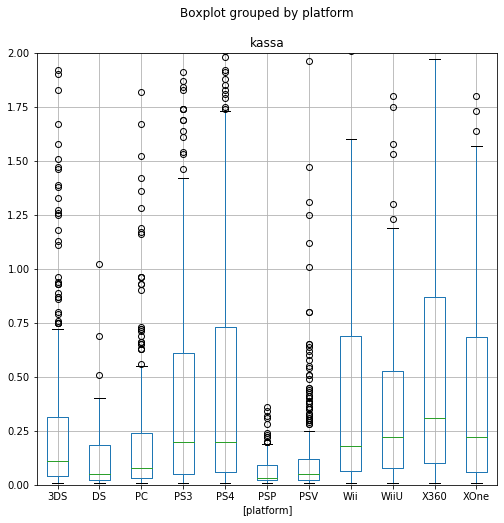

In [17]:
games_sales = data_actual[['platform','kassa']]
games_sales.boxplot(by='platform',figsize=(8,8))
plt.ylim(0,2)
plt.show()

В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. 
Например, у прямых конкурентов PS3 и X360 (приставки одного поколения) медианы и межквартильные размахи близки по значению. Такая же ситуация у PS4 и XOne.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

0.5561703537455748 Корреляция оценок

-0.03843374216971549 Корреляция оценок пользователей и выручки


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


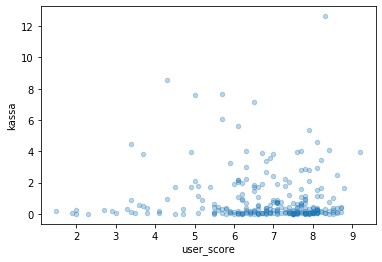


0.40656790206178095 Корреляция оценок критиков и выручки


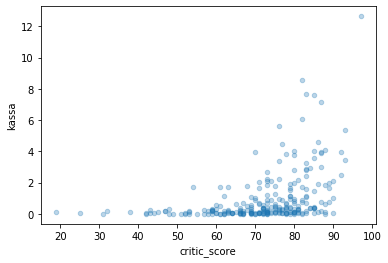


0.1909914398797197 Корреляция интегральной оценки и выручки



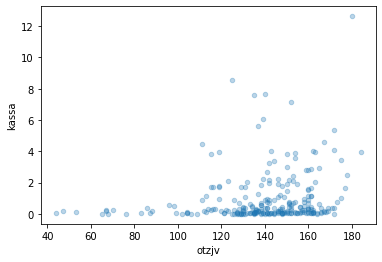

In [18]:
data_actual_PS4 = data_actual.query('platform == "PS4"')

print(data_actual_PS4['user_score'].corr(data_actual_PS4['critic_score']), "Корреляция оценок")
data_actual_PS4['desat'] = 10
data_actual_PS4['otzjv'] = (data_actual_PS4['critic_score'] + 
                            (data_actual_PS4['user_score'] * data_actual_PS4['desat']))
print()
print(data_actual_PS4['user_score'].corr(data_actual_PS4['kassa']), "Корреляция оценок пользователей и выручки")
data_actual_PS4.plot(y='kassa', x='user_score', kind='scatter', alpha=0.3)
plt.show()
print()
print(data_actual_PS4['critic_score'].corr(data_actual_PS4['kassa']), "Корреляция оценок критиков и выручки")
data_actual_PS4.plot(y='kassa', x='critic_score', kind='scatter', alpha=0.3)
plt.show()
print()
print(data_actual_PS4['otzjv'].corr(data_actual_PS4['kassa']), "Корреляция интегральной оценки и выручки")
print()
data_actual_PS4.plot(y='kassa', x='otzjv', kind='scatter', alpha=0.3)
plt.show()
print()

0.49736789516405855 Корреляция оценок

-0.011470292402127756 Корреляция оценок пользователей и выручки


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


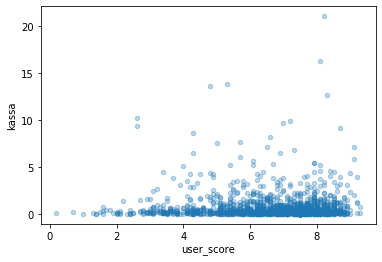


0.2847728298723546 Корреляция оценок критиков и выручки


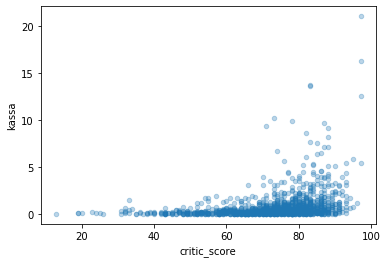


0.15754726700850116 Корреляция интегральной оценки и выручки



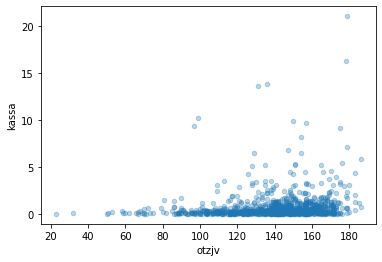

In [19]:
data_actual_other = data_actual.query('platform != "PS4"')

print(data_actual_other['user_score'].corr(data_actual_other['critic_score']), "Корреляция оценок")
data_actual_other['desat'] = 10
data_actual_other['otzjv'] = (data_actual_other['critic_score'] + 
                        (data_actual_other['user_score'] * data_actual_other['desat']))
print()
print(data_actual_other['user_score'].corr(data_actual_other['kassa']), "Корреляция оценок пользователей и выручки")
data_actual.plot(y='kassa', x='user_score', kind='scatter', alpha=0.3)
plt.show()
print()
print(data_actual_other['critic_score'].corr(data_actual_other['kassa']), "Корреляция оценок критиков и выручки")
data_actual.plot(y='kassa', x='critic_score', kind='scatter', alpha=0.3)
plt.show()
print()
print(data_actual_other['otzjv'].corr(data_actual_other['kassa']), "Корреляция интегральной оценки и выручки")
print()
data_actual_other.plot(y='kassa', x='otzjv', kind='scatter', alpha=0.3)
plt.show()
print()

Под интегральной оценкой в данном случае подразумевается простое арифметическое сложение двух оценок - пользоватлей и критиков. Оценка пользователей умножена на поправочный коэффициент 10, что бы у этих оценок был одинаковый масштаб. Результат представлен в столбце "otzjv".

Редко, но оценки пользователей и критиков всё таки совпадают с продажами. Критики гораздо чаще ставят высокие оценки успешным играм (в смысле количества продаж), в особенности это касается PS4.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [20]:

genre = data.pivot_table(index = 'genre',
                                values = 'kassa', aggfunc = 'sum')

print(genre.sort_values('kassa', ascending = False).head(50))

                kassa
genre                
Action        1716.52
Sports        1309.67
Shooter       1041.36
Role-Playing   931.08
Platform       825.55
Misc           790.29
Racing         723.49
Fighting       442.66
Simulation     387.96
Puzzle         239.89
Adventure      233.33
Strategy       172.57


Наиболее прибыльные жанры завязаны на получение сильных и резких эмоций, которые заставляют игрока поддерживать постоянное взаимодействие с игрой. Игры, которые не требует стремительной реакции, самые не прибыльные.

### Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [21]:
print('Мир')
data_pivot_PT5 = data_actual.pivot_table(index = 'platform', values = 'kassa', aggfunc = 'sum')
print(data_pivot_PT5.sort_values('kassa', ascending = False).head())

Мир
           kassa
platform        
PS4       314.14
PS3       288.79
X360      236.54
3DS       194.61
XOne      159.32


In [22]:
print('Северная Америка')
data_pivot_PT5_NA = data_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
print(data_pivot_PT5_NA.sort_values('na_sales', ascending = False).head())

Северная Америка
          na_sales
platform          
X360        140.05
PS4         108.74
PS3         103.38
XOne         93.12
3DS          55.31


In [23]:
print('Европа')
data_pivot_PT5_EU = data_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
print(data_pivot_PT5_EU.sort_values('eu_sales', ascending = False).head())

Европа
          eu_sales
platform          
PS4         141.09
PS3         106.86
X360         74.52
XOne         51.59
3DS          42.64


In [24]:
print('Япония')
data_pivot_PT5_JP = data_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
print(data_pivot_PT5_JP.sort_values('jp_sales', ascending = False).head())

Япония
          jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01


Самые популярные жанры (топ-5). Поясните разницу.

In [25]:
data_pivot_PT5 = data_actual.pivot_table(index = 'genre', values = 'kassa', aggfunc = 'sum')
print(data_pivot_PT5.sort_values('kassa', ascending = False).head())

               kassa
genre               
Action        441.12
Shooter       304.73
Role-Playing  192.80
Sports        181.07
Misc           85.04


In [26]:
data_pivot_PT5 = data_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
print(data_pivot_PT5.sort_values('na_sales', ascending = False).head())

              na_sales
genre                 
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19


In [27]:
data_pivot_PT5 = data_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
print(data_pivot_PT5.sort_values('eu_sales', ascending = False).head())

              eu_sales
genre                 
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29


In [28]:
data_pivot_PT5 = data_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
print(data_pivot_PT5.sort_values('jp_sales', ascending = False).head())

              jp_sales
genre                 
Role-Playing     65.44
Action           52.80
Misc             12.86
Simulation       10.41
Fighting          9.44


Японцам сильно отличаются от всех остальных. Им нравиться влиять на характеристики персонажа и играть на "цветных тетрисах" и отечественных платформах. По всей видимости популярность жанра "Role-Playing" связана с популярностью платформы "3DS".

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [29]:
data['rating'].value_counts()
data_actual['rating'] = data_actual['rating'].replace('E', '2')
data_actual['rating'] = data_actual['rating'].replace('T', '4')
data_actual['rating'] = data_actual['rating'].replace('M', '5')
data_actual['rating'] = data_actual['rating'].replace('E10+', '3')
data_actual['rating'] = data_actual['rating'].replace('EC', '1')
data_actual['rating'] = data_actual['rating'].replace('RP', '0')
data_actual['rating'] = data_actual['rating'].replace('K-A', '2')
data_actual['rating'] = data_actual['rating'].replace('AO', '6')
data_actual['rating'] = data_actual['rating'].fillna(0)
data_actual['rating'] = data_actual['rating'].astype('int')
print(data_actual['kassa'].corr(data_actual['rating'], method = 'spearman'))

0.3948913123646253


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [30]:
print('Северная Америка')
print(data_actual['na_sales'].corr(data_actual['rating'], method = 'spearman'))

Северная Америка
0.5083045490573884


In [31]:
print('Европа')
print(data_actual['eu_sales'].corr(data_actual['rating'], method = 'spearman'))

Европа
0.5014311254787556


In [32]:
print('Япония')
print(data_actual['jp_sales'].corr(data_actual['rating'], method = 'spearman'))

Япония
-0.2122787045480552


Связь есть. При помощи коэффициента корреляции Спирмена выяснено, что в Северной Америке и Европе популярнее более "взрослые" игры.

Европейцам и североамериканцам нравится играть в Action и Shooter на современных видеоприставках.
Японцам сильно отличаются от всех остальных. Им нравиться влиять на характеристики персонажа и играть на "цветных тетрисах" и отечественных платформах. По всей видимости популярность жанра "Role-Playing" связана с популярностью платформы "3DS".
При помощи коэффициента корреляции Спирмена выяснено, что в Северной Америке и Европе популярнее более "взрослые" игры.

### Шаг 5. Проверьте гипотезы

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [206]:
data_actual = data_actual.query('user_score != "nan"')
data_actual_Xbox_One = data_actual.query('platform == "XOne"')
data_actual_PC = data_actual.query('platform =="PC"')

alpha = .05

Xbox_One = data_actual_Xbox_One['user_score'].tolist()
PC = data_actual_PC['user_score'].tolist()

print(np.var(Xbox_One), "Xbox_One")

print(np.var(PC), "PC")

results = st.ttest_ind(Xbox_One, PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.8398947622754973 Xbox_One
2.7182183688596395 PC
p-значение: 0.4163295193897021
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза: Средние пользовательские рейтинги жанров Action(англ.«действие») и Sports(англ.«виды спорта») одинаковые.

In [207]:
data_actual_Action = data_actual.query('genre == "Action"')
data_actual_Sports = data_actual.query('genre =="Sports"')

alpha = .05

Action = data_actual_Action['user_score'].tolist()
Sports = data_actual_Sports['user_score'].tolist()

print(np.var(Action), "Action")

print(np.var(Sports), "Sports")

results = st.ttest_ind(Action, Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.762050048920228 Action
3.078415582146912 Sports
p-значение: 8.135327514933318e-25
Отвергаем нулевую гипотезу


Одни и те же игры на разных платформах получают часто похожие рейтинги/отзывы. Рейтинги игр по жанрам разные.

### Шаг 6. Напишите общий вывод

Правильно строить прогноз на 2017 надо на данных начиная с 2012 (2012 - 2016 это будет актуальный период). Критики гораздо чаще ставят высокие оценки успешным играм. Наиболее прибыльные жанры завязаны на получение сильных и резких эмоций, которые заставляют игрока поддерживать постоянное взаимодействие с игрой. Игры, которые не требует стремительной реакции самые неприбыльные. Японцам сильно отличаются от всех остальных. Им нравиться влиять на характеристики персонажа и играть на "цветных тетрисах" и отечественных платформах. По всей видимости популярность жанра "Role-Playing" связана с популярностью платформы "3DS" в Японии. При помощи коэффициента корреляции Спирмена выяснено, что в Северной Америке и Европе популярнее более "взрослые" игры. Одни и те же игры на разных платформах получают часто похожие рейтинги/отзывы. Рейтинги игр по жанрам разные.
В Северной Америке и Европе популярны видеоприставки PS и Xbox, жанры - Action, Sports, Shooter. В Японии - компактные платформы 3DS и WiiU, во вторую очередь отечественный PS; жанры - Role-Playing, во вторую очередь Action.